<a href="https://colab.research.google.com/github/Ifeeding99/tensorflow-scripts/blob/main/cirrhosis_predictor_with_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

## **Context**

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused
by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism.
The following data contains the information collected from the Mayo Clinic trial
in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984.
A description of the clinical background for the trial and the covariates recorded here
is in Chapter 0, especially Section 0.2 of Fleming and Harrington, Counting
Processes and Survival Analysis, Wiley, 1991.
A more extended discussion can be found in Dickson, et al., Hepatology 10:1-7 (1989)
and in Markus, et al., N Eng J of Med 320:1709-13 (1989).

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval,
met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine.
The first 312 cases in the dataset participated in the randomized trial and contain largely complete data.
The additional 112 cases did not participate in the clinical trial but consented
to have basic measurements recorded and to be followed for survival.
Six of those cases were lost to follow-up shortly after diagnosis,
so the data here are on an additional 106 cases as well as the 312 randomized participants.

# **Attribute Information**
1. ID: unique identifier
2. N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3. Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4. Drug: type of drug D-penicillamine or placebo
5. Age: age in [days]
6. Sex: M (male) or F (female)
7. Ascites: presence of ascites N (No) or Y (Yes)
8. Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9. Spiders: presence of spiders N (No) or Y (Yes)
10. Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11. Bilirubin: serum bilirubin in [mg/dl]
12. Cholesterol: serum cholesterol in [mg/dl]
13. Albumin: albumin in [gm/dl]
14. Copper: urine copper in [ug/day]
15. Alk_Phos: alkaline phosphatase in [U/liter]
16. SGOT (aspartate transaminase or serum glutamic-oxaloacetic transaminase): SGOT in [U/ml]
17. Triglycerides: triglicerides in [mg/dl]
18. Platelets: platelets per cubic [ml/1000]
19. Prothrombin: prothrombin time in seconds [s]
20. Stage: histologic stage of disease (1, 2, 3, or 4)

https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset

I will ignore the columns 'Drug','Status','ID', 'N_Days' and I will try to predict the stage of the desease ('Stage' column)
You can predict many charaterics of this dataset, predicting the stage is particularly challeging:
I couldn't get to more than 55% accuracy more or less (often less)
I then tried to predict (with standard ML techniques) wheter the cirrhosis was severe (stage 3 or 4) or at its beginning (stage 1 or 2).
The accuracy in the latter case is around 80% at best but more often between 65% and 75%

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('cirrhosis.csv')
# removing useless columns
df.pop('Drug')
df.pop('ID')
df.pop('Status')
df.pop('N_Days')
# removing patients with only basic checks
df = df[0:312]
df.head()

,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
# check for nan values
nan_col = df.columns[df.isna().any()].tolist()
nan_col

['Cholesterol', 'Copper', 'Tryglicerides', 'Platelets']

In [ ]:
# imputing nans
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

columns_names = ['Cholesterol', 'Copper', 'Tryglicerides', 'Platelets', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Albumin',
                 'Alk_Phos', 'SGOT', 'Prothrombin', 'Stage'] # ColumnTransformer puts transformed columns ahead, so I have to rearrange the dataset
imputers = [
            ['imputer', SimpleImputer(), [7,9,12,13]]
]
ct = ColumnTransformer(transformers = imputers, remainder = 'passthrough')
df = pd.DataFrame(ct.fit_transform(df))
df.columns = columns_names
df.head()

,Cholesterol,Copper,Tryglicerides,Platelets,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Alk_Phos,SGOT,Prothrombin,Stage
0,261.0,156.0,172.0,190.0,21464,F,Y,Y,Y,Y,14.5,2.6,1718.0,137.95,12.2,4.0
1,302.0,54.0,88.0,221.0,20617,F,N,Y,Y,N,1.1,4.14,7394.8,113.52,10.6,3.0
2,176.0,210.0,55.0,151.0,25594,M,N,N,N,S,1.4,3.48,516.0,96.1,12.0,4.0
3,244.0,64.0,92.0,183.0,19994,F,N,Y,Y,S,1.8,2.54,6121.8,60.63,10.3,4.0
4,279.0,143.0,72.0,136.0,13918,F,N,Y,Y,N,3.4,3.53,671.0,113.15,10.9,3.0


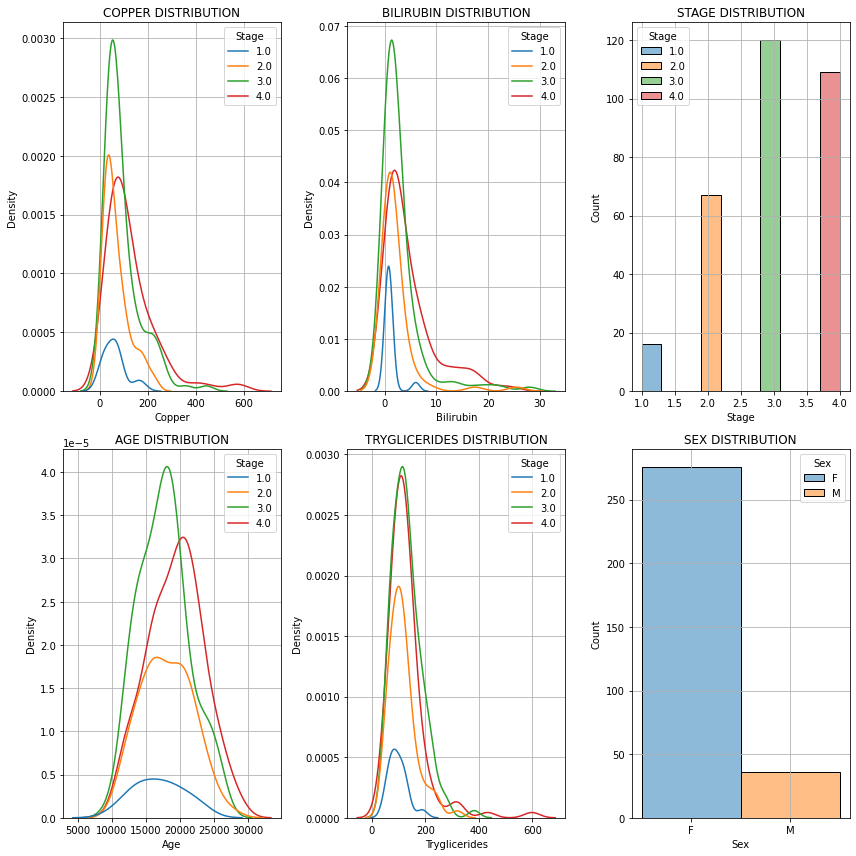

In [ ]:
fig, ax = plt.subplots(2,3, figsize = (12,12))
sns.kdeplot(x = 'Copper', hue = 'Stage', data = df, palette='tab10', ax = ax[0,0], )
sns.kdeplot(x = 'Bilirubin', hue = 'Stage', data = df, palette='tab10', ax = ax[0,1])
sns.histplot(x = 'Stage', data = df, ax = ax[0,2], hue = 'Stage', palette = 'tab10')
sns.kdeplot(x = 'Age', hue = 'Stage', data = df, palette='tab10', ax = ax[1,0])
sns.kdeplot(x = 'Tryglicerides', hue = 'Stage', data = df, palette='tab10', ax = ax[1,1])

sns.histplot(x = 'Sex', data = df, ax = ax[1,2], hue = 'Sex')
ax[0,0].set_title('COPPER DISTRIBUTION')
ax[0,1].set_title('BILIRUBIN DISTRIBUTION')
ax[0,2].set_title('STAGE DISTRIBUTION')
ax[1,0].set_title('AGE DISTRIBUTION')
ax[1,1].set_title('TRYGLICERIDES DISTRIBUTION')
ax[1,2].set_title('SEX DISTRIBUTION')

ax[0,0].grid()
ax[0,1].grid()
ax[0,2].grid()
ax[1,0].grid()
ax[1,1].grid()
ax[1,2].grid()

plt.tight_layout()

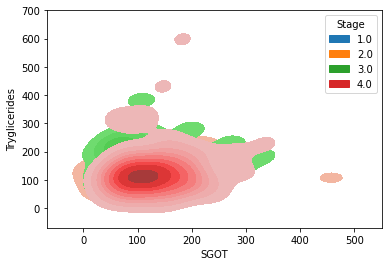

In [ ]:
sns.kdeplot(x='SGOT',y='Tryglicerides', hue = 'Stage', palette = 'tab10', data = df, shade = True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

y = df.pop('Stage')
trans = [
         ['encoder', OneHotEncoder(), [5,6,7,8,9]]
]
ct = ColumnTransformer(trans, remainder='passthrough')
df = ct.fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state = 0)

In [ ]:
import numpy as np
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers

model = Sequential([
                    layers.BatchNormalization(),
                    layers.Dense(10, activation = 'relu', input_shape = [21]),
                    layers.Dropout(0.5),
                    layers.BatchNormalization(),
                    layers.Dense(10,activation = 'relu'),
                    layers.Dropout(0.5),
                    layers.BatchNormalization(),
                    layers.Dense(4, activation = 'softmax')
])

In [ ]:
for i,el in enumerate(y_train):
  if el == 1:
    y_train[i] = 0
  elif el == 2:
    y_train[i] = 1
  if el == 3:
    y_train[i] = 2
  if el == 4:
    y_train[i] = 3

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
training = model.fit(X_train,
                     y_train,
                     batch_size = 16,
                     epochs = 200)

Epoch 1/200
15/15 [==============================] - 35s 3ms/step - loss: 1.7159 - accuracy: 0.2479
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 1.5348 - accuracy: 0.2821
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 1.5378 - accuracy: 0.3291
Epoch 4/200
15/15 [==============================] - 0s 3ms/step - loss: 1.5501 - accuracy: 0.2692
Epoch 5/200
15/15 [==============================] - 0s 3ms/step - loss: 1.5021 - accuracy: 0.2607
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 1.5332 - accuracy: 0.2906
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 1.5544 - accuracy: 0.3034
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 1.4595 - accuracy: 0.2821
Epoch 9/200
15/15 [==============================] - 0s 3ms/step - loss: 1.4610 - accuracy: 0.3120
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 1.4210 - accuracy: 0.3547
Epoch 11

In [ ]:
for i,el in enumerate(y_test):
  if el == 1:
    y_test[i] = 0
  elif el == 2:
    y_test[i] = 1
  if el == 3:
    y_test[i] = 2
  if el == 4:
    y_test[i] = 3

In [ ]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 1.0515 - accuracy: 0.5000


[1.0514583587646484, 0.5]